# The First Program

In lecture 3 the *Hello, World!* program in Julia was introduced:

In [1]:
println("Hello, World!")

Hello, World!


This is an example of a *print* statement, although it doesn't print anything on paper. It displays a result on the screen.

The double quotation marks in the program mark the beginning and the end of the text to be displayed; they don't appear in the result.

The parenthese indicate that `println` is a *function*. We'll get to functions in lecture 6.

In Python, the `print` statement is slightly different. It is also a function but the text is delimited by single quotation marks:

In [2]:
using PyCall

```python
print('Hello, World!')
```

# Arithmetic Operators

After *Hello, World!*, the next step is arithmetic. Julia, Python and C++ provides *operators* as Matlab (Octave). *Operators* are special symbols that represent computations like addition and multiplication:

In [3]:
150+140

290

In [4]:
172-171

1

In [5]:
6*7

42

The operator `/` performs division:

In [6]:
84/2

42.0

You might wonder why the result is `42.0` instead of `42`. It will be explained in the next slides.

In C++ this is not the case:

In [7]:
using Cxx

In [8]:
icxx"84/2;"

42

Finally the operator `^` is used for exponentiation; that is, it raises a number to a power:

In [9]:
6^2 + 6

42

In Python, `^` is a bitwise operator called *EOR*. If you are not familiar with bitwise operators, the result will suprise you:

In [10]:
py"6^2 + 6"

14

The use of bitwise operators is explained during the mini-projects. In Python the operator `**` performs exponentiation:

In [11]:
py"6**2 + 6"

42

# Values and Types

A *value* is one of the basic things a program works with, like a letter or a number. Some values we have seen so far are `2`, `42.0`, and `"Hello, World"`.

These values belong to different types: `2` is an integer, `42.0` is a floating-point number, and `"Hello, World!"` is a string, so-called because the letters it contains are strung together.

If you are not sure what type a value has, the interpreter can tell you:

In [12]:
typeof(2)

Int64

In [13]:
typeof(42.0)

Float64

In [14]:
typeof("Hello, World!")

String

In Python a similar command exists:

In [15]:
py"type(2)"

PyObject <class 'int'>

In [16]:
py"type(42.0)"

PyObject <class 'float'>

In [17]:
py"type('Hello, World!')"

PyObject <class 'str'>

In these results, the word “class” is used in the sense of a category; a type is a category of values.

What about values like `"2"` and `"42.0"`? They look like numbers, but they are in quotation marks like strings`

In [18]:
typeof("2")

String

In [19]:
typeof("42.0")

String

They’re strings.

When you type a large integer, you might be tempted to use commas between groups of digits, as in `1,000,000`. This is not a legal integer in Julia or Python, but it is legal:

In [20]:
1,000,000

(1, 0, 0)

That’s not what we expected at all! Julia and Python interprets 1,000,000 as a comma-separated sequence of integers. We’ll learn more about this kind of sequence later.

# Assignment Statements

One of the most powerful features of a programming language is the ability to manipulate variables. A *variable* is a name that refers to a value.

An *assignment* statement creates a new variable and gives it a value:

In [21]:
message = "And now for something completely different"

"And now for something completely different"

In [22]:
n = 17

17

In [23]:
π = 3.141592653589793

3.141592653589793

This example makes three assignments. The first assigns a string to a new variable named `message`; the second gives the integer 17 to `n`; the third assigns the (approximate) value of π to `π`.

In Python this is completely similar:
```python
message = 'And now for something completely different'
n = 17
pi = 3.141592653589793
```

In C++, the declaration of the variable has to be explicit or inferred and the assignement can be done afterwards:
```c++
#include <string>
std::string message {"And now for something completely different"};
int n;
n = 17;
auto pi {3.141592653589793};
```

A common way to represent variables on paper is to write the name with an arrow pointing to its value. This kind of figure is called a *state diagram* because it shows what state each of the variables is in (think of it as the variable’s state of mind).

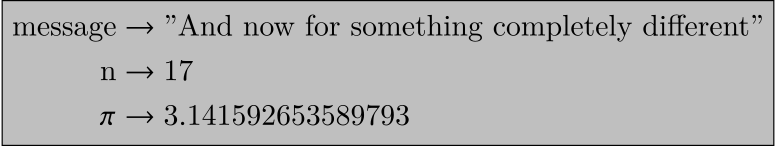

In [24]:
using TikzPictures
TikzPicture(L"""
    \node [draw, fill=lightgray] {$\begin{aligned}
    \textrm{message}&\rightarrow \textrm{"And now for something completely different"}\\
    \textrm{n}&\rightarrow 17\\
    \pi&\rightarrow 3.141592653589793
    \end{aligned}$};
"""; options="very thick, scale=3, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
""")

# Variable Names

Programmers generally choose names for their variables that are meaningful—they document what the variable is used for.

Variable names can be as long as you like. They can contain both letters and numbers, but they can’t begin with a number. It is legal to use uppercase letters, but it is conventional to use only lower case for variables names.

The underscore character, &#95;, can appear in a name. It is often used in names with multiple words, such as `your_name` or `airspeed_of_unladen_swallow`.

If you give a variable an illegal name, you get a syntax error:

In [25]:
76trombones = "big parade"

LoadError: [91msyntax: "76" is not a valid function argument name[39m

In [26]:
more@ = 100000

LoadError: [91msyntax: unexpected "="[39m

In [27]:
type = "Advanced Theoretical Zymurgy"

LoadError: [91msyntax: unexpected "="[39m

`76trombones` is illegal because it begins with a number. `more@` is illegal because it contains an illegal character, `@`. But what’s wrong with `type`

It turns out that `type` is one of Julia’s keywords. The interpreter uses keywords to recognize the structure of the program, and they cannot be used as variable names.

# Expressions and Statements

An *expression* is a combination of values, variables, and operators. A value all by itself is considered an expression, and so is a variable, so the following are all legal expressions:

In [28]:
42

42

In [29]:
n

17

In [30]:
n + 25

42

When you type an expression at the prompt, the interpreter evaluates it, which means that it finds the value of the expression. In this example, `n` has the value 17 and `n + 25` has the value 42.

A *statement* is a unit of code that has an effect, like creating a variable or displaying a value.

In [31]:
n = 17

17

In [32]:
println(n)

17


The first line is an *assignment* statement that gives a value to `n`. The second line is a *print* statement that displays the value of `n`.

When you type a statement, the interpreter executes it, which means that it does whatever the statement says. In general, statements don’t have values.

# Script Mode

So far we have run Julia in interactive mode, which means that you interact directly with the interpreter. Interactive mode is a good way to get started, but if you are working with more than a few lines of code, it can be clumsy.

The alternative is to save code in a file called a script and then run the interpreter in script mode to execute the script. By convention, Julia scripts have names that end with `.ju` and Python scripts with `.py`.

Because Julia and Python provides both modes, you can test bits of code in interactive mode before you put them in a script. But there are differences between interactive mode and script mode that can be confusing. For example, if you are using Julia as a calculator, you might type:

In [33]:
miles = 26.2
miles * 1.61

42.182

The first line assigns a value to `miles`, but it has no visible effect. The second line is an expression, so the interpreter evaluates it and displays the result. It turns out that a marathon is about 42 kilometers.

But if you type the same code into a script and run it, you get no output at all. In script mode an expression, all by itself, has no visible effect. Python actually evaluates the expression, but it doesn’t display the value unless you tell it to:
```julia
miles = 26.2
println(miles * 1.61)
```
This behavior can be confusing at first.

A script usually contains a sequence of statements. If there is more than one statement, the results appear one at a time as the statements execute. For example, the script

```julia
println(1)
x = 2
println(x)
```
produces the output
```
1
2
```
The *assignment* statement produces no output.

# Order of operations

When an expression contains more than one operator, the order of evaluation depends on the order of operations. For mathematical operators, Python follows mathematical convention. The acronym **PEMDAS** is a useful way to remember the rules:

- Parentheses have the highest precedence and can be used to force an expression to evaluate in the order you want. Since expressions in parentheses are evaluated first, `2 * (3-1)` is `4`, and `(1+1)^(5-2)` is `8`. You can also use parentheses to make an expression easier to read, as in `(minute * 100) / 60`, even if it doesn’t change the result.

- Exponentiation has the next highest precedence, so `1 + 2^3` is `9`, not `27`, and `2 * 3**2` is `18`, not `36`.

- Multiplication and Division have higher precedence than Addition and Subtraction. So `2*3-1` is `5`, not `4`, and `6+4/2` is `8`, not `5`.

- Operators with the same precedence are evaluated from left to right (except exponentiation). So in the expression `degrees / 2 * π`, the division happens first and the result is multiplied by `π`. To divide by `2 π`, you can use parentheses or write `degrees / 2 / π`.


# String operations

In general, you can’t perform mathematical operations on strings, even if the strings look like numbers, so the following are illegal:

In [34]:
"2" - "1"

LoadError: [91mMethodError: no method matching -(::String, ::String)[0m
Closest candidates are:
  -([91m::PyCall.PyObject[39m, ::Any) at /home/jupyter/.julia/v0.6/PyCall/src/pyoperators.jl:11[39m

In [35]:
"eggs" / "easy"

LoadError: [91mMethodError: no method matching /(::String, ::String)[0m
Closest candidates are:
  /([91m::PyCall.PyObject[39m, ::Any) at /home/jupyter/.julia/v0.6/PyCall/src/pyoperators.jl:11[39m

But there are two exceptions, `*` (`+` in Python) and `^` (`*` in Python).

The `*` operator performs string concatenation, which means it joins the strings by linking them end-to-end. For example:

In [36]:
first = "throat"
second = "warbler"
first * second

"throatwarbler"

The `^` operator also works on strings; it performs repetition. For example,

In [37]:
"spam"^3

"spamspamspam"

If the first is a string, the second has to be an integer.

# Comments

As programs get bigger and more complicated, they get more difficult to read. Formal languages are dense, and it is often difficult to look at a piece of code and figure out what it is doing, or why.

For this reason, it is a good idea to add notes to your programs to explain in natural language what the program is doing. These notes are called comments, and they start with the `#` (`\\` in C++) symbol:

In [38]:
# compute the percentage of the hour that has elapsed
minute = 45
percentage = (minute * 100) / 60

75.0

In this case, the comment appears on a line by itself. You can also put comments at the end of a line:

In [39]:
percentage = (minute * 100) / 60     # percentage of an hour

75.0

Everything from the `#` to the end of the line is ignored—it has no effect on the execution of the program.

Comments are most useful when they document non-obvious features of the code. It is reasonable to assume that the reader can figure out what the code does; it is more useful to explain why.

This comment is redundant with the code and useless:

In [40]:
v = 5     # assign 5 to v

5

This comment contains useful information that is not in the code:

In [41]:
v = 5     # velocity in meters/second. 

5

Good variable names can reduce the need for comments, but long names can make complex expressions hard to read, so there is a tradeoff.